In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Bio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Настройка стиля для графиков
sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.2 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSerov/rdkit/denis/to_gc_cont.csv')[['SMDBid', 'siRNA sense', 'siRNA antisense']]

In [ ]:
df

,SMDBid,siRNA sense,siRNA antisense
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU
...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC


In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
def find_complementary_region_df(df, sense_col, antisense_col, aligned_sense_col='aligned_sense', aligned_antisense_col='aligned_antisense'):
    """
    Finds the best local alignment between sequences from two columns of a DataFrame
    and adds the aligned sequences to new columns. Handles both RNA and DNA
    sequences based on the presence of thymine (T).

    Args:
        df (pd.DataFrame): The input DataFrame.
        sense_col (str): The name of the column containing the sense sequences.
        antisense_col (str): The name of the column containing the antisense sequences.
        aligned_sense_col (str, optional): The name for the new column to store aligned sense sequences. Defaults to 'aligned_sense'.
        aligned_antisense_col (str, optional): The name for the new column to store aligned antisense sequences. Defaults to 'aligned_antisense'.

    Returns:
        pd.DataFrame: The DataFrame with the added aligned sequence columns.
    """

    aligned_sense_list = []
    aligned_antisense_list = []

    for index, row in df.iterrows():
        sense_seq = row[sense_col]
        antisense_seq = row[antisense_col]

        if "T" in antisense_seq:
           antisense_rc = str(Seq(antisense_seq).reverse_complement())
        else:
            antisense_rc = str(Seq(antisense_seq).reverse_complement_rna())

        alignments = pairwise2.align.localms(sense_seq, antisense_rc, 2, -1, -0.5, -0.1)
        if alignments:
             best_alignment = alignments[0]

             aligned_sense, aligned_antisense = best_alignment.seqA, best_alignment.seqB
        else:
            aligned_sense,  = None, None

        aligned_sense_list.append(aligned_sense)
        aligned_antisense_list.append(aligned_antisense)

    df[aligned_sense_col] = aligned_sense_list
    df[aligned_antisense_col] = aligned_antisense_list
    return df

/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
df_with_aligned = find_complementary_region_df(df, 'siRNA sense',	'siRNA antisense')

In [ ]:
df_with_aligned

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----
...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--


In [ ]:
#old
def count_mismatches(df, aligned_seq_col1, aligned_seq_col2):

    mismatch_counts = []

    for _, row in df.iterrows():
        seq1 = row[aligned_seq_col1]
        seq2 = row[aligned_seq_col2]

        if seq1 is None or seq2 is None: # Обработка None случаев
          mismatch_counts.append(None)
          continue

        mismatch_count = 0
        for i in range(min(len(seq1), len(seq2))):
            if seq1[i] != seq2[i] and seq1[i] != '-' and seq2[i] != '-':
                mismatch_count += 1
        mismatch_counts.append(mismatch_count)

    df['mismatch_count'] = mismatch_counts
    return df

In [ ]:
df_mismatches = count_mismatches(df_with_aligned, 'aligned_sense',	'aligned_antisense')
df_mismatches

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0
...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0


In [ ]:
df_mismatches[df_mismatches['mismatch_count'] != 0]

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count
61,SM5256,UCAUCACACUGAAUACCAAUU,GTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC-----,1
68,SM5249,UCAUCACACUGAAUACCAAUU,GTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC-----,1
71,SM5246,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1
78,SM5239,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1
81,SM5236,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1
...,...,...,...,...,...,...
3407,SM0029,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1
3408,SM0028,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1
3409,SM0027,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1
3410,SM0025,GACGTAAACGGCCACAAGTTC,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTC,GCGACG-UAAACGGCCACAAGU--,1


In [ ]:
df_mismatches['mismatch_count'].value_counts()

,count
mismatch_count,
0,2888
1,502
2,38
3,7


In [ ]:
def trim_and_compare_lengths(df, seq_col1, seq_col2):


    trimmed_seq1_list = []
    trimmed_seq2_list = []
    min_length_list = []


    for _, row in df.iterrows():
        seq1 = row[seq_col1]
        seq2 = row[seq_col2]

        if seq1 is None or seq2 is None:
            trimmed_seq1_list.append(None)
            trimmed_seq2_list.append(None)
            min_length_list.append(None)
            continue

        # Trim leading '-'
        trimmed_seq1 = seq1.lstrip('-')
        trimmed_seq2 = seq2.lstrip('-')

        # Trim trailing '-'
        trimmed_seq1 = trimmed_seq1.rstrip('-')
        trimmed_seq2 = trimmed_seq2.rstrip('-')


        trimmed_seq1_list.append(trimmed_seq1)
        trimmed_seq2_list.append(trimmed_seq2)

        min_length = min(len(trimmed_seq1), len(trimmed_seq2)) if trimmed_seq1 and trimmed_seq2 else None
        min_length_list.append(min_length)



    df['trimmed_seq1'] = trimmed_seq1_list
    df['trimmed_seq2'] = trimmed_seq2_list
    df['min_length'] = min_length_list
    return df


In [ ]:
df_trimmed = trim_and_compare_lengths(df_mismatches, 'aligned_sense',	'aligned_antisense')
df_trimmed

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18
...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21


In [ ]:
df_trimmed['min_length'].value_counts()

,count
min_length,
21,927
22,900
23,587
25,262
27,181
24,177
26,124
20,105
18,96


In [ ]:
df_trimmed[df_trimmed['min_length'] > 25]

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length
41,SM5276,ACAACAGACUUUAAUGUAAUU,TTACATTAAAGTCTGTTGTUU,--ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA--,0,ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA,26
48,SM5269,ACAACAGACUUUAAUGUAAUU,TTACATTAAAGTCTGTTGTUU,--ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA--,0,ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA,26
51,SM5266,ACAACAGACUUUAAUGUAAUU,TTACATTAAAGTCTGTTGTUU,--ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA--,0,ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA,26
58,SM5259,ACAACAGACUUUAAUGUAAUU,TTACATTAAAGTCTGTTGTUU,--ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA--,0,ACAACAGACUUU---AAU-GU-AAUU,AAACAACAGAC---TTTAA-TG-TAA,26
100,SM5216,CUUUAACAAUUCCUGAAAUUU,ATTTCAGGAATTGTTAAAGUU,--CUUU---AACAAUU--CCU-GAAAUUU,AAC---TTTAACAA--TTCC-TGAAAT--,1,CUUU---AACAAUU--CCU-GAAAUUU,AAC---TTTAACAA--TTCC-TGAAAT,27
...,...,...,...,...,...,...,...,...,...
1708,SM2219,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27
1709,SM2214,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27
1710,SM2213,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27
1711,SM2212,CUGGCCUUUCACUACUCCUACGAGCAC,GUGCUCGUAGGAGUAGUGAAAGGCCAG,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,0,CUGGCCUUUCACUACUCCUACGAGCAC,CUGGCCUUUCACUACUCCUACGAGCAC,27


In [ ]:
df_trimmed['mismatches_%'] = (df_trimmed['mismatch_count']/df_trimmed['min_length'])*100

In [ ]:
def calculate_gc_content(df, seq_column):
    """
    Функция для расчета GC-состава последовательностей в указанной колонке.
    """
    df[f'{seq_column} GC content'] = df[seq_column].apply(gc_fraction)
    return df

df_trimmed = calculate_gc_content(df_trimmed, 'siRNA sense')
df_trimmed = calculate_gc_content(df_trimmed, 'siRNA antisense')

In [ ]:
df_trimmed['siRNA sense GC content'] = df_trimmed['siRNA sense GC content'] * 100
df_trimmed['siRNA antisense GC content'] = df_trimmed['siRNA antisense GC content'] * 100
df_trimmed

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22,0.0,19.047619,22.222222
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857


In [ ]:
df_trimmed['GC content'] = (df_trimmed['siRNA sense GC content'] + df_trimmed['siRNA antisense GC content'])/2
df_trimmed

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content,GC content
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22,0.0,19.047619,22.222222,20.634921
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905


In [ ]:
def calculate_tm(row):
    """Вычисляет температуру плавления (Tm) для пары sense/antisense.  Если percent_mismatch == 0, то Tm == 0."""
    percent_mismatch = float(row['mismatches_%'])  # используем уже посчитанный процент несовпадений
    sense = float(row['min_length'])
    percent_gc = float(row['GC content'])


    tm = 81.5 + ((0.41 * percent_gc) - (675 / sense) - percent_mismatch)
    return tm

In [ ]:
df_trimmed['Tm'] = df_trimmed.apply(calculate_tm, axis=1)
df_trimmed

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content,GC content,Tm
0,SM5317,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317
1,SM5316,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,--AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA-----,0,AAAU-CAU-GGU-GAAAU-AAAAUU,AAAAA-TCA-TGG-TGAAA-TA,22,0.0,19.047619,22.222222,20.634921,59.278499
2,SM5315,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317
3,SM5314,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317
4,SM5313,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,--AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA-----,0,AAAUCAUGGUGAAAUAAAAUU,AAAAAUCAUGGUGAAAUA,18,0.0,19.047619,22.222222,20.634921,52.460317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429
3431,SM0004,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU---,0,GACGUAAACGGCCACAAGUUCT,GCGACGUAAACGGCCACAAGU,21,0.0,50.000000,57.142857,53.571429,71.321429
3432,SM0003,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524
3433,SM0002,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,--GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU--,0,GACGUAAACGGCCACAAGUUC,GCGACGUAAACGGCCACAAGU,21,0.0,52.380952,57.142857,54.761905,71.809524


In [ ]:
df_trimmed.to_csv('df_mismatches.csv')

<Axes: >

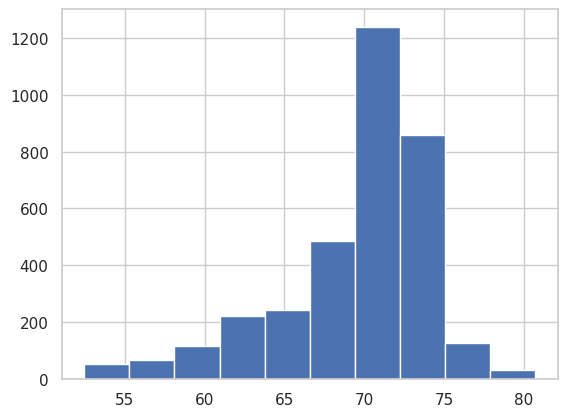

In [ ]:
df_trimmed['Tm'].hist()

<Axes: >

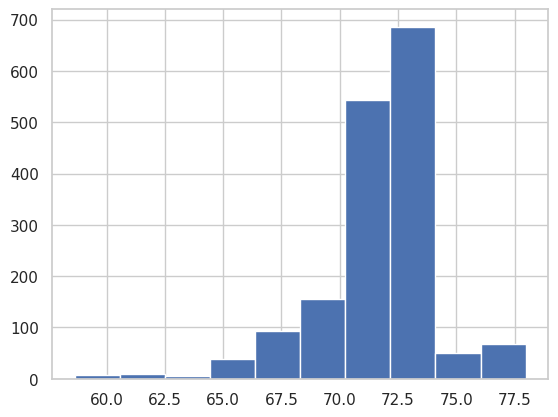

In [ ]:
df_mismatches[(df_mismatches['GC content'] > 47)  & (df_mismatches['GC content'] < 53)]['Tm'].hist()

<Axes: >

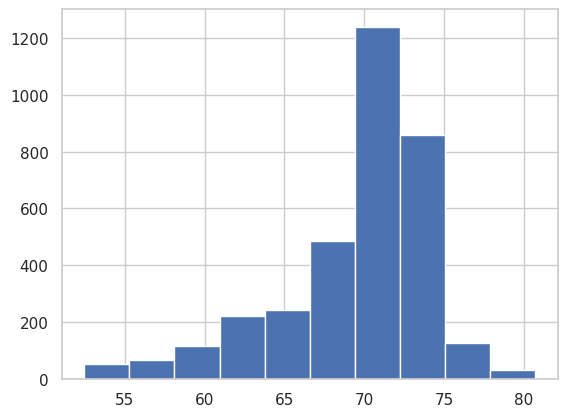

In [ ]:
df_mismatches['Tm'].hist()

In [ ]:
df_trimmed[df_trimmed['mismatch_count'] != 0]

,SMDBid,siRNA sense,siRNA antisense,aligned_sense,aligned_antisense,mismatch_count,trimmed_seq1,trimmed_seq2,min_length,mismatches_%,siRNA sense GC content,siRNA antisense GC content,GC content,Tm
61,SM5256,UCAUCACACUGAAUACCAAUU,GTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC-----,1,UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC,21,4.761905,33.333333,33.333333,33.333333,58.261905
68,SM5249,UCAUCACACUGAAUACCAAUU,GTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC-----,1,UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TAC,21,4.761905,33.333333,33.333333,33.333333,58.261905
71,SM5246,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1,UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA,24,4.166667,33.333333,33.333333,33.333333,62.875000
78,SM5239,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1,UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA,24,4.166667,33.333333,33.333333,33.333333,62.875000
81,SM5236,UCAUCACACUGAAUACCAAUU,TTGGTATTCAGTGTGATGAUU,--UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA--,1,UCAU-CACACU-GAAU-ACCAAUU,AATCA-TCACAC-TGAA-TACCAA,24,4.166667,33.333333,33.333333,33.333333,62.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,SM0029,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1,GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU,22,4.545455,50.000000,57.142857,53.571429,68.237013
3408,SM0028,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1,GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU,22,4.545455,50.000000,57.142857,53.571429,68.237013
3409,SM0027,GACGTAAACGGCCACAAGTTCT,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU---,1,GACGT-AAACGGCCACAAGTTCT,GCGACG-UAAACGGCCACAAGU,22,4.545455,50.000000,57.142857,53.571429,68.237013
3410,SM0025,GACGTAAACGGCCACAAGTTC,ACUUGUGGCCGUUUACGUCGC,--GACGT-AAACGGCCACAAGTTC,GCGACG-UAAACGGCCACAAGU--,1,GACGT-AAACGGCCACAAGTTC,GCGACG-UAAACGGCCACAAGU,22,4.545455,52.380952,57.142857,54.761905,68.725108


In [ ]:
def longest_matching_region(df, seq_col1, seq_col2):
    """
    Calculates the length of the longest matching region between two sequences,
    skipping positions with '-' in either sequence.

    Args:
        df (pd.DataFrame): DataFrame containing the sequences.
        seq_col1 (str): Name of the column containing the first sequence.
        seq_col2 (str): Name of the column containing the second sequence.

    Returns:
        pd.DataFrame: DataFrame with an added 'longest_matching_region' column
                      containing the length of the longest matching region for each row.
    """

    longest_regions = []

    for _, row in df.iterrows():
        seq1 = row[seq_col1]
        seq2 = row[seq_col2]


        if seq1 is None or seq2 is None: # Handle None cases
          longest_regions.append(None)
          continue

        max_length = 0
        current_length = 0
        for i in range(min(len(seq1), len(seq2))):
            if seq1[i] == '-' or seq2[i] == '-': # Skip positions with '-'
              continue

            if seq1[i] == seq2[i]: # Check for matching chars
                current_length += 1
            else:
                max_length = max(max_length, current_length)
                current_length = 0
        max_length = max(max_length, current_length) # Check one last time

        longest_regions.append(max_length)

    df['longest_matching_region'] = longest_regions
    return df

In [ ]:
df_trimmed = longest_matching_region(df_trimmed, 'aligned_sense',	'aligned_antisense')

In [ ]:
df_trimmed['longest_matching_region'].value_counts()

,count
longest_matching_region,
19,1305
18,522
17,444
15,260
16,242
13,152
20,115
14,94
23,65


In [ ]:
def plot_complementary_region_distribution(df, name):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=False, sharey=False)

    x = 'longest_matching_region'
    # Гистограмма с KDE
    variable = df[x]
    sns.histplot(variable, kde=True, alpha=.5, bins=30, binwidth=1, ax=ax)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=23)
    ax.legend()

    # Установка целочисленных делений на оси X и только четные метки
    min_val = int(variable.min())
    max_val = int(variable.max())
    xticks = np.arange(min_val, max_val + 1)
    even_xticks = xticks[xticks % 2 == 0]
    ax.set_xticks(even_xticks)
    ax.set_xticklabels(even_xticks)  # Устанавливаем метки оси X

    # Бокс-плот (inset) - top right
    ax_inset = plt.gca().inset_axes([0.66, 0.6, 0.34, 0.4])
    sns.boxplot(y=df[x], ax=ax_inset, boxprops=dict(alpha=.85))
    ax_inset.set_xlabel('', fontsize=17)
    ax_inset.set_ylabel('Complementary Region Length', fontsize=11)
    ax_inset.grid(False)
    ax_inset.set_title("")

    # Настройка меток оси Y для боксплота (только четные)
    ymin = int(df[x].min())
    ymax = int(df[x].max())
    yticks = np.arange(ymin, ymax + 1)
    even_yticks = yticks[yticks % 2 == 0]
    ax_inset.set_yticks(even_yticks)
    ax_inset.set_yticklabels(even_yticks)

    plt.title(f'')
    plt.xlabel('Complementary Region Length', fontsize=25)
    plt.ylabel('Frequency', fontsize=25)
    plt.savefig(f'{name}.png', dpi=1000, bbox_inches='tight')
    plt.show()


<ipython-input-47-4076bd18af9d>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


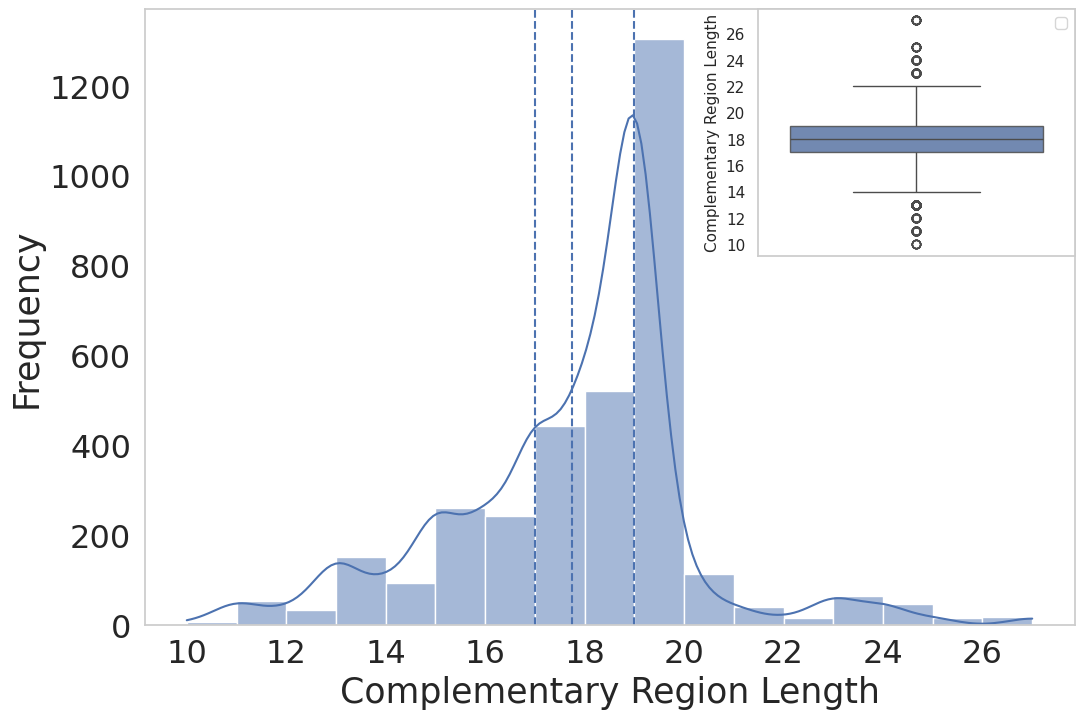

In [ ]:
plot_complementary_region_distribution(df, 'complementary.png')

In [ ]:
df_trimmed['mismatch_count'].value_counts()

,count
mismatch_count,
0,2888
1,502
2,38
3,7


In [ ]:
df_trimmed.to_csv('df_mismatches.csv')